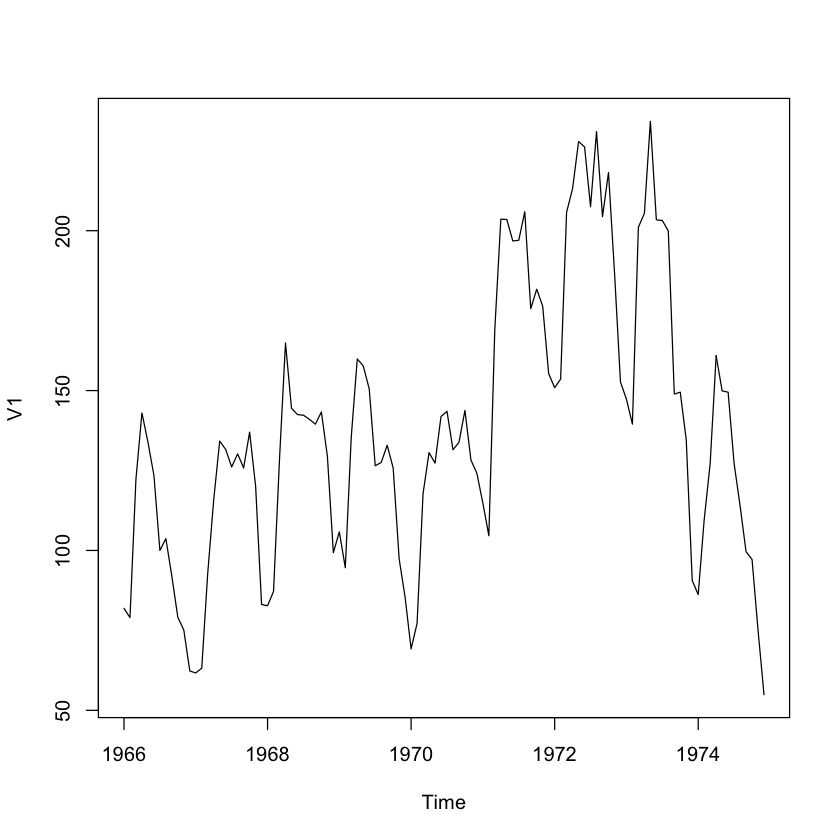

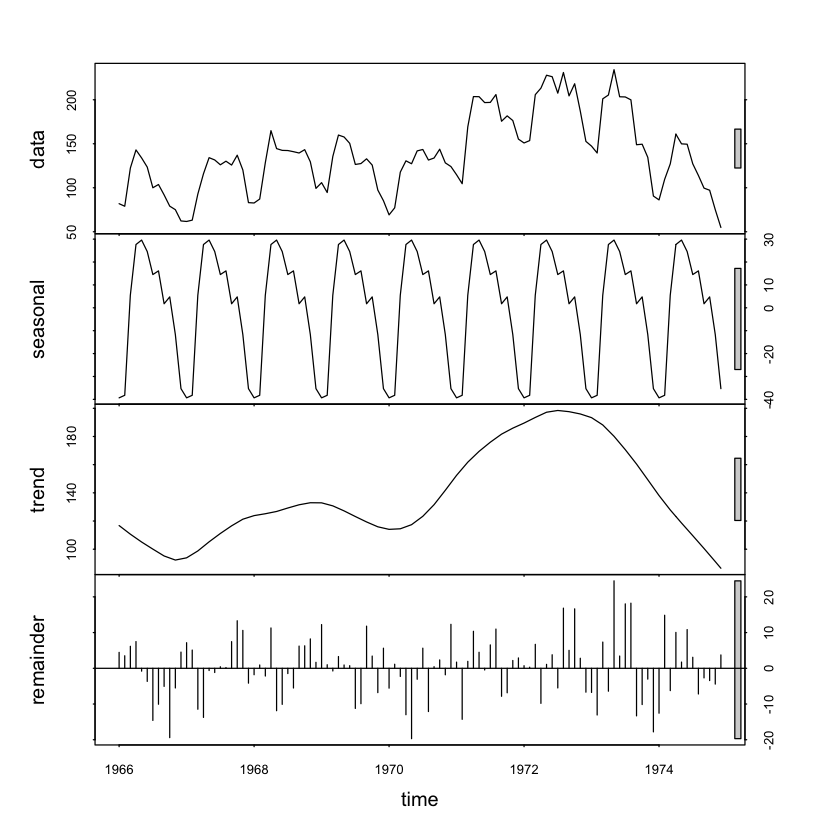

In [2]:
CONST<- read.table("Const.txt",header=T,sep=",",row.names=1)
plot(const)
const <- ts(CONST,start=1966, frequency=12)
const.stl <- stl(const[,1], s.window="periodic")
# s.window-parametrin avulla voidaan määrät kausivaihtelun
# estimoimiseen käyettyä menetelmää
plot(const.stl)


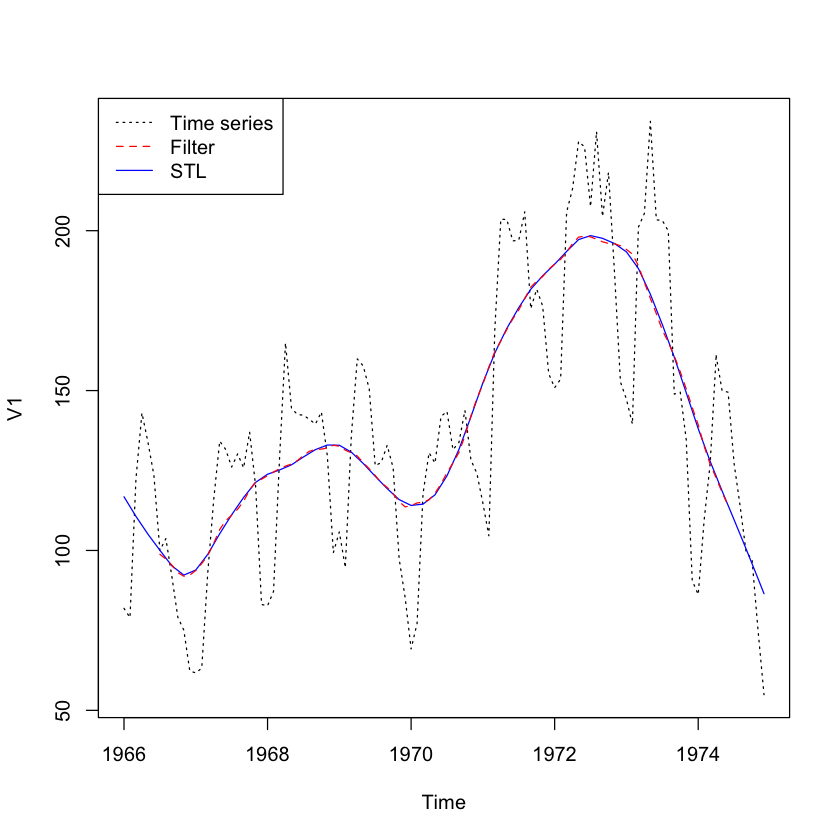

In [3]:
const.filt <- filter(const, c(1,rep(2,11),1)/24 )
trend <- const.stl$time.series[,2]
plot(const,lty=3)
lines(trend, col="blue")
lines(const.filt, lty=2, col="red")
legend("topleft", legend=c("Time series","Filter","STL"),
col=c(1,"red","blue"), lty=c(3,2,1))

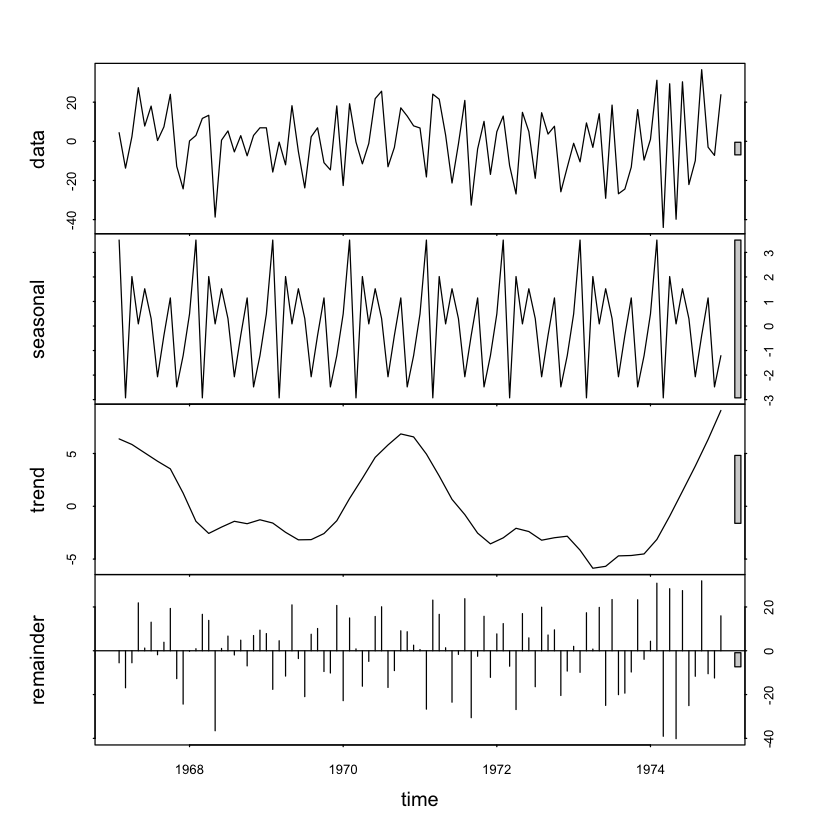

In [5]:
const.diff <- diff(diff(const, lag=12))
const.diff.stl <- stl(const.diff[,1], s.window="periodic")
plot(const.diff.stl)

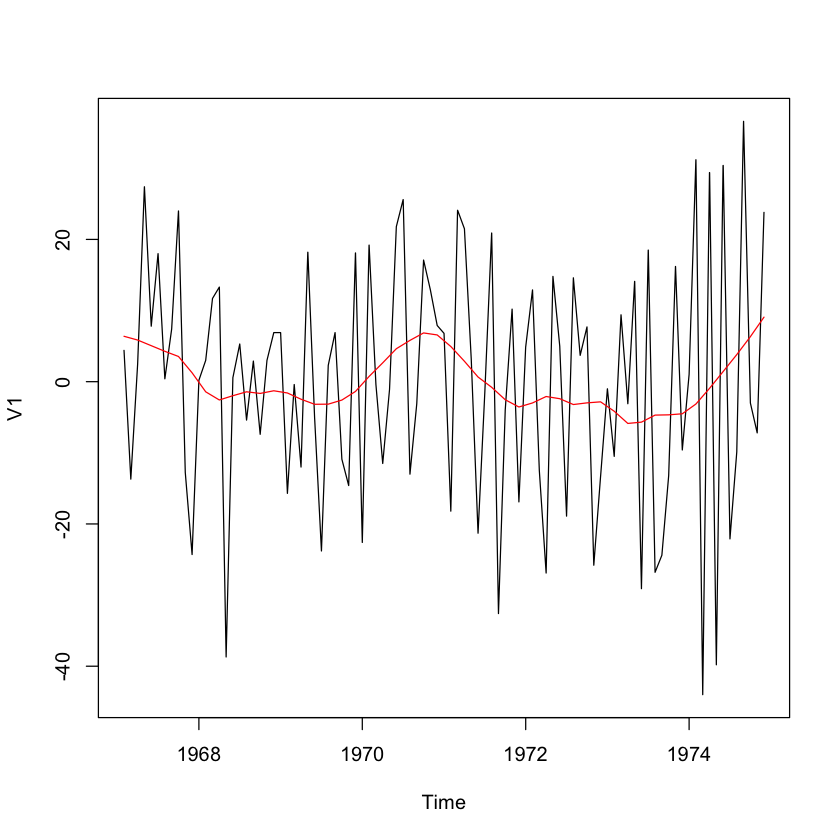

In [10]:
plot(const.diff)
lines(const.diff.stl$time.series[,2], col="red")

In [11]:
install.packages("KFAS")
library(KFAS)
alko <-ts(read.table("Alkokuolema.txt"),start=1969)

Warning message in install.packages("KFAS"):
“installation of package ‘KFAS’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(KFAS): there is no package called ‘KFAS’


In [13]:
install.packages('KFAS', repos='http://cran.us.r-project.org')

Warning message in install.packages("KFAS", repos = "http://cran.us.r-project.org"):
“installation of package ‘KFAS’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [14]:
install_github('helske/KFAS')

from URL https://api.github.com/repos/helske/KFAS/zipball/master
Installing KFAS
'/Users/oskarimantere/anaconda3/lib/R/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/nk/_n06zmxs5p9gr9k7jn2bwykm0000gn/T/Rtmpx155B4/devtools71b366496298/helske-KFAS-0564624'  \
  --library='/Users/oskarimantere/anaconda3/lib/R/library' --install-tests 



In [15]:
library(KFAS)

In [16]:
alko <- ts(read.table('Alkokuolema.txt'), start=1969)

, , 1

         [,1]
[1,] 4.260163

, , 1

         [,1]
[1,] 9.488375

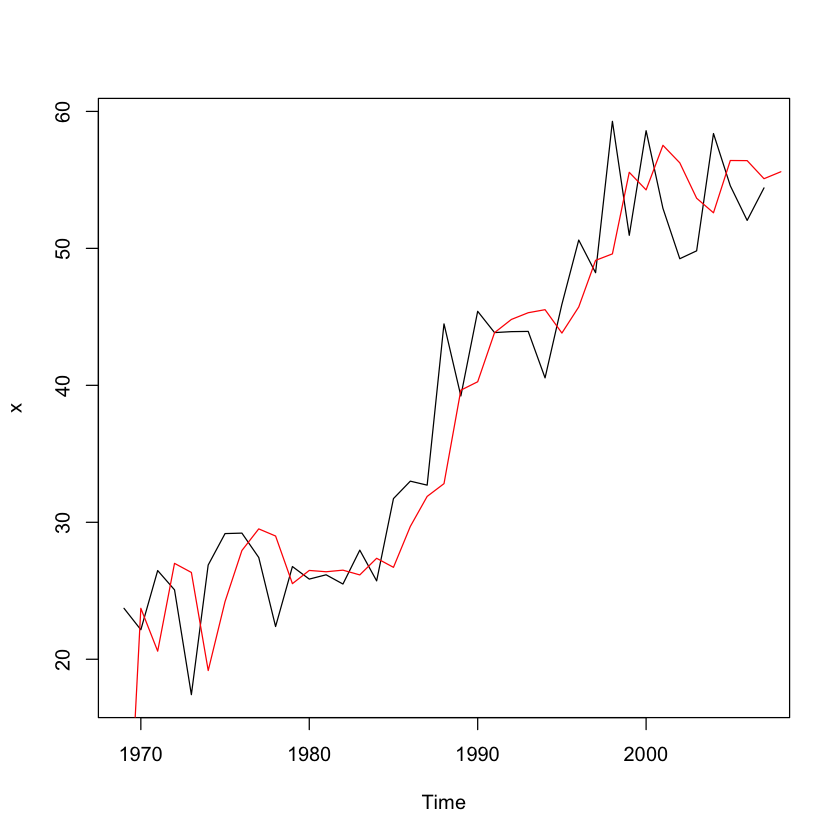

In [17]:
Zt <- matrix(c(1, 0), 1, 2) #Vastaa vektorin H transpoosia
Ht <- matrix(NA) #Vastaa w_t varianssia
Tt <- matrix(c(1, 0, 1, 1), 2, 2) #Vastaa matriisia F
Rt <- matrix(c(1, 0), 2, 1)
Qt <- matrix(NA) #Vastaa epsilon_t varianssia
P1 <- matrix(0, 2, 2)
P1inf <- diag(2)
# -1 kaavassa määrää että mallissa ei estimoida vakiota,
model_gaussian <- SSModel(alko~-1+SSMcustom(Z = Zt, T=Tt, R = Rt, Q=Qt,
P1=P1, P1inf=P1inf), H=Ht)
fit_gaussian <- fitSSM(model_gaussian, inits = c(0, 0))
fit_gaussian$model$Q # muuttujan epsilon_t varianssin SU-estimaatti
fit_gaussian$model$H # muuttujan w_t varianssin SU-estimaatti
out_gaussian <- KFS(fit_gaussian$model)
plot(alko)
lines(out_gaussian$a[,1],col="red")